In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
#import tensorflow as tf
import warnings
from sklearn.metrics import classification_report
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold, LeaveOneOut,StratifiedKFold

In [20]:
# Chargement du jeu de données
palu=pd.read_excel('C:\\Users\\ASUS\\Documents\\these\\code_these-master\\MORBIDITE.xls')

In [21]:
palu

,TEMPERATURE,S_M8_APPETIT,S_FATIGUE,S_ARTHRALGI,S_T_DIGESTIF,S_VERTIGE,S_FRISSON,S_MYALGIE,S_DABDO,S_VOMISS,S_NAUSEE,S_FIEVRE,S_CEPHALE,Diagnostic,TDR
0,37.5,0,0,0,0,0,0,0,0,1,0,1,1,0,2.0
1,37.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.0
2,37.5,0,0,0,0,0,0,0,0,1,0,1,1,0,2.0
3,36.0,0,0,0,0,0,0,0,0,1,0,0,1,0,2.0
4,37.5,0,0,0,0,0,0,0,0,0,0,1,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16087,38.0,1,0,0,0,0,0,0,0,0,0,0,1,1,1.0
16088,39.0,1,0,0,0,0,0,0,0,0,0,0,1,1,1.0
16089,40.0,0,0,0,0,0,1,0,0,0,0,0,1,1,1.0
16090,39.0,1,0,0,0,0,0,0,0,0,0,0,1,1,1.0


In [22]:
import pandas_profiling as pp
#pp.ProfileReport(palu)

In [23]:
# Selection des features du paludisme
paluu=pd.DataFrame(palu, columns = [  'TEMPERATURE','S_M8_APPETIT', 'S_FATIGUE', 'S_ARTHRALGI',
                                    'S_T_DIGESTIF', 'S_VERTIGE', 'S_FRISSON', 'S_MYALGIE', 'S_DABDO', 
                                    'S_VOMISS', 'S_NAUSEE', 'S_CEPHALE', 'S_FIEVRE','Diagnostic'])


In [24]:
paluu

,TEMPERATURE,S_M8_APPETIT,S_FATIGUE,S_ARTHRALGI,S_T_DIGESTIF,S_VERTIGE,S_FRISSON,S_MYALGIE,S_DABDO,S_VOMISS,S_NAUSEE,S_CEPHALE,S_FIEVRE,Diagnostic
0,37.5,0,0,0,0,0,0,0,0,1,0,1,1,0
1,37.0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,37.5,0,0,0,0,0,0,0,0,1,0,1,1,0
3,36.0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,37.5,0,0,0,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16087,38.0,1,0,0,0,0,0,0,0,0,0,1,0,1
16088,39.0,1,0,0,0,0,0,0,0,0,0,1,0,1
16089,40.0,0,0,0,0,0,1,0,0,0,0,1,0,1
16090,39.0,1,0,0,0,0,0,0,0,0,0,1,0,1


In [25]:

# Selection des features du paludisme
#paluu=pd.DataFrame(palu, columns = ['fievre','Cephalee','Arthralgie','Frisson'])
    
# Selection des features du paludisme
X=paluu.iloc[:,0:13]   
# Nous séparons notre variable cible en deux parties. Une partie pour entrainer y_train et une partie pour tester y_test
#X = paluu
y = palu['Diagnostic']
X1_train, MX_test, y1_train, My_test = train_test_split(X, y, random_state=0)

#Suréchantillonnage avec l'algorithme SMOTE
#X1 = paluu
#y1 =palu['Diagnostic']
#y1= pd.DataFrame(y1)

In [26]:
X

,TEMPERATURE,S_M8_APPETIT,S_FATIGUE,S_ARTHRALGI,S_T_DIGESTIF,S_VERTIGE,S_FRISSON,S_MYALGIE,S_DABDO,S_VOMISS,S_NAUSEE,S_CEPHALE,S_FIEVRE
0,37.5,0,0,0,0,0,0,0,0,1,0,1,1
1,37.0,0,0,0,0,0,0,0,0,0,0,0,0
2,37.5,0,0,0,0,0,0,0,0,1,0,1,1
3,36.0,0,0,0,0,0,0,0,0,1,0,1,0
4,37.5,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16087,38.0,1,0,0,0,0,0,0,0,0,0,1,0
16088,39.0,1,0,0,0,0,0,0,0,0,0,1,0
16089,40.0,0,0,0,0,0,1,0,0,0,0,1,0
16090,39.0,1,0,0,0,0,0,0,0,0,0,1,0


(array([6869.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        9223.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

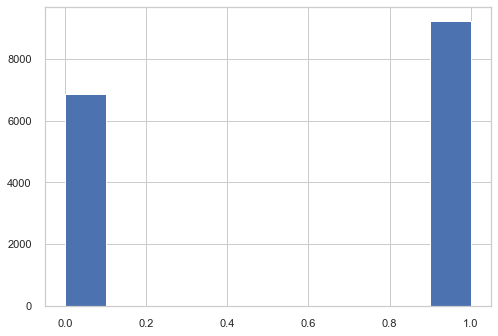

In [27]:
# Histogramme de la variable predictive diagnostic
plt.hist(y)

In [10]:
X1_train.shape

(12069, 13)

In [11]:
MX_test.shape

(4023, 13)

# Cross Validation

In [12]:
# Les differentes methodes pour faire une validation croisée(Cross Validation)
cv=KFold(5,random_state=0)
cv1= LeaveOneOut()
cv2=StratifiedKFold(5)  

# Dans la suite la méthode StratifiedKFold(10) est utilisée car elle permet de prendre en compte des données désiquilibrées.

# DecisionTreeClassifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
# Chercher les meilleurs paramètres du modele
param_grid={'max_depth': np.arange(12,20), 'criterion':['gini','entropy']}
grid=GridSearchCV( DecisionTreeClassifier(),param_grid, cv=cv2)
grid.fit(X1_train,y1_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([12, 13, 14, 15, 16, 17, 18, 19])})

In [46]:
#Afficher le meilleur score
print('best score',grid.best_score_)
# Afficher les meilleurs parametres
print('best score',grid.best_params_)
# Recuperer le meilleur modele fourni 
model=grid.best_estimator_
print('best score',model.score(MX_test,My_test))

best score 0.6138859484887679
best score {'criterion': 'entropy', 'max_depth': 13}
best score 0.6301267710663684


In [47]:
# Afficher la matrice de confusion
print(confusion_matrix(My_test, model.predict(MX_test)))  
# Afficher le rapport de la classification
print(classification_report(My_test,model.predict(MX_test)))

[[ 689 1018]
 [ 470 1846]]
              precision    recall  f1-score   support

           0       0.59      0.40      0.48      1707
           1       0.64      0.80      0.71      2316

    accuracy                           0.63      4023
   macro avg       0.62      0.60      0.60      4023
weighted avg       0.62      0.63      0.61      4023



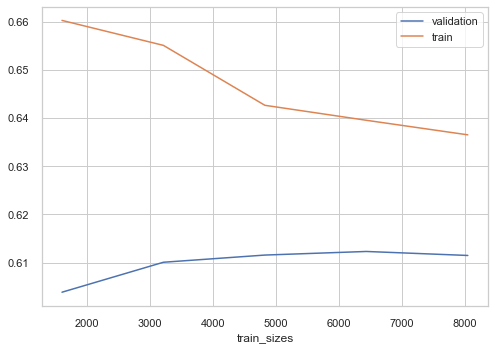

In [50]:
# Tracer les courbes d'apprentissages: Veci permet de verifier s'il y a surapprentissage ou apprentissage
N, train_score, val_score=learning_curve(model, X1_train, y1_train, train_sizes=np.linspace(0.2, 1.0,5), cv=3)
plt.plot(N,val_score.mean(axis=1), label= 'validation')
plt.plot(N,train_score.mean(axis=1), label= 'train')
plt.xlabel('train_sizes')
plt.legend()
plt.show()

0.6417669091913516


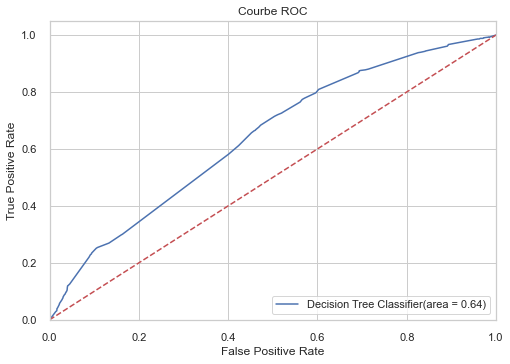

In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred=model.predict_proba(MX_test)[:,1]
# Calculer l'air sous la courbe
logit_roc_auc = roc_auc_score(My_test,y_pred)
print(logit_roc_auc)
# Tracer la courbe roc
fpr, tpr, thresholds = roc_curve(My_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Classifier(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

0.6417669091913516


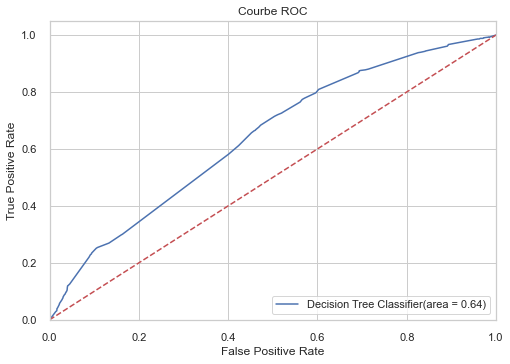

In [52]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred=model.predict_proba(MX_test)[:,1]
# Calculer l'air sous la courbe
logit_roc_auc = roc_auc_score(My_test,y_pred)
print(logit_roc_auc)
# Tracer la courbe roc
fpr, tpr, thresholds = roc_curve(My_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree Classifier(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
param_grid={'max_depth': np.arange(14,20), 'criterion':['gini','entropy'],'n_estimators':[10,50,100, 200, 300,400]}
grid=GridSearchCV( RandomForestClassifier(),param_grid, cv=cv2)
grid.fit(X1_train,y1_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([14, 15, 16, 17, 18, 19]),
                         'n_estimators': [10, 50, 100, 200, 300, 400]})

In [54]:
grid1=grid
print('best score',grid1.best_score_)
print('best score',grid1.best_params_)
model1=grid1.best_estimator_
print('best score',model1.score(MX_test,My_test))

best score 0.6166201028604037
best score {'criterion': 'gini', 'max_depth': 17, 'n_estimators': 50}
best score 0.6333581904051703


In [55]:
N, train_score, val_score=learning_curve(model1, X1_train, y1_train, train_sizes=np.linspace(0.2, 1.0,5), cv=cv2)

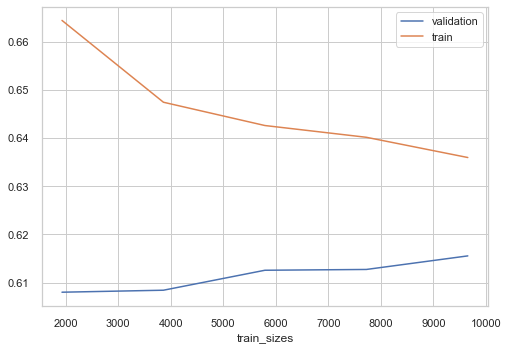

In [56]:
plt.plot(N,val_score.mean(axis=1), label= 'validation')
plt.plot(N,train_score.mean(axis=1), label= 'train')
plt.xlabel('train_sizes')
plt.legend()

In [57]:
print(confusion_matrix(My_test, model1.predict(MX_test)))  
print(classification_report(My_test,model1.predict(MX_test)))

[[ 572 1135]
 [ 340 1976]]
              precision    recall  f1-score   support

           0       0.63      0.34      0.44      1707
           1       0.64      0.85      0.73      2316

    accuracy                           0.63      4023
   macro avg       0.63      0.59      0.58      4023
weighted avg       0.63      0.63      0.60      4023



0.6445924431857848


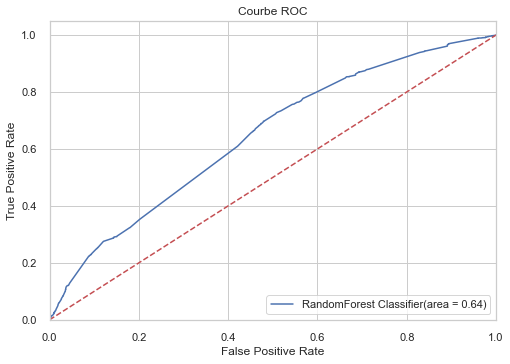

In [58]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred=model1.predict_proba(MX_test)[:,1]
logit_roc_auc = roc_auc_score(My_test,y_pred)
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(My_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='RandomForest Classifier(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
rf= LogisticRegression()

In [60]:
from sklearn.linear_model import LogisticRegression
param_grid={'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'max_iter':[10, 100,500,1000, 2000, 3000,4000]}
grid2=GridSearchCV( LogisticRegression(),param_grid, cv=StratifiedKFold(5)  )
grid2.fit(X1_train,y1_train)
print('best score',grid2.best_score_)
print('best score',grid2.best_params_)
model2=grid2.best_estimator_
print('best score',model2.score(MX_test,My_test))

best score 0.6138031671170829
best score {'max_iter': 10, 'solver': 'liblinear'}
best score 0.6196868008948546


In [61]:
N, train_score, val_score=learning_curve(model2, X1_train, y1_train, train_sizes=np.linspace(0.2, 1.0,5), cv=StratifiedKFold(5)  )

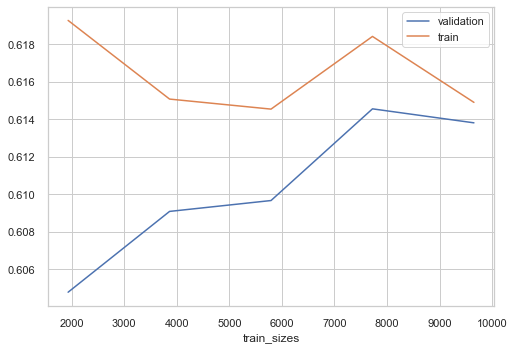

In [62]:
plt.plot(N,val_score.mean(axis=1), label= 'validation')
plt.plot(N,train_score.mean(axis=1), label= 'train')
plt.xlabel('train_sizes')
plt.legend()

In [63]:
print(confusion_matrix(My_test, model2.predict(MX_test)))  
print(classification_report(My_test,model2.predict(MX_test)))

[[ 611 1096]
 [ 434 1882]]
              precision    recall  f1-score   support

           0       0.58      0.36      0.44      1707
           1       0.63      0.81      0.71      2316

    accuracy                           0.62      4023
   macro avg       0.61      0.59      0.58      4023
weighted avg       0.61      0.62      0.60      4023



0.6296810198380538


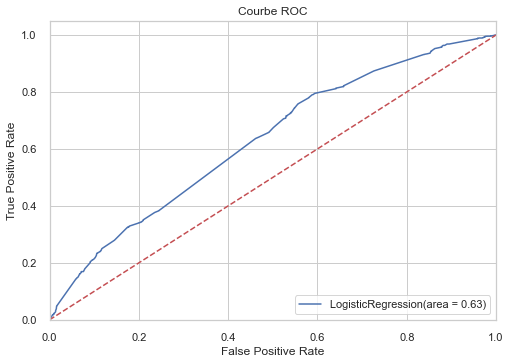

In [64]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred=model2.predict_proba(MX_test)[:,1]
logit_roc_auc = roc_auc_score(My_test,y_pred)
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(My_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='LogisticRegression(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# NAIVES BAYES ALGORITHM

In [13]:
from sklearn.naive_bayes import GaussianNB  
param_grid={'var_smoothing': np.linspace(0.1,1,10)}
grid3=GridSearchCV( GaussianNB(),param_grid, cv=StratifiedKFold(5)  )
grid3.fit(X1_train,y1_train)
print('best score',grid3.best_score_)
print('best score',grid3.best_params_)
model3=grid3.best_estimator_
print('best score',model3.score(MX_test,My_test))

best score 0.6103233967074921
best score {'var_smoothing': 0.2}
best score 0.6224210787969178


In [14]:
N, train_score, val_score=learning_curve(model3, X1_train, y1_train, train_sizes=np.linspace(0.2, 1.0,5), cv=cv2)

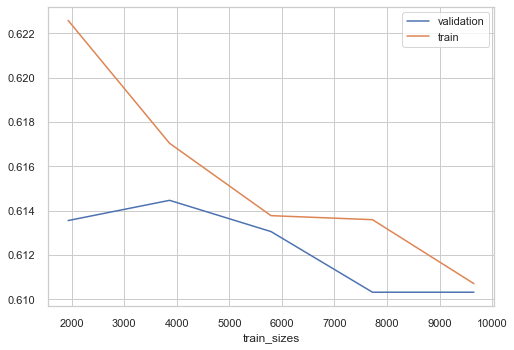

In [28]:
plt.plot(N,val_score.mean(axis=1), label= 'validation')
plt.plot(N,train_score.mean(axis=1), label= 'train')
plt.xlabel('train_sizes')
plt.legend()

In [29]:
print(confusion_matrix(My_test, model3.predict(MX_test)))  
print(classification_report(My_test,model3.predict(MX_test)))

[[ 573 1134]
 [ 385 1931]]
              precision    recall  f1-score   support

           0       0.60      0.34      0.43      1707
           1       0.63      0.83      0.72      2316

    accuracy                           0.62      4023
   macro avg       0.61      0.58      0.57      4023
weighted avg       0.62      0.62      0.60      4023



0.6337645810757897


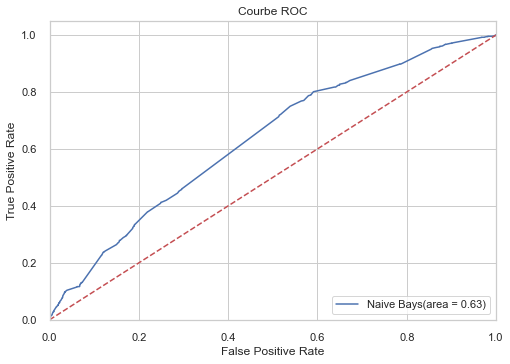

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred=model3.predict_proba(MX_test)[:,1]
logit_roc_auc = roc_auc_score(My_test,y_pred)
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(My_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Naive Bays(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# SVM avec kernel

In [69]:
from sklearn.svm import SVC  
param_grid={'kernel':['rbf','linear','sigmoid']}
grid4=GridSearchCV(SVC(probability=True),param_grid, cv=cv2)
grid4.fit(X1_train,y1_train)
print('best score',grid4.best_score_)
print('best score',grid4.best_params_)
model4=grid4.best_estimator_
print('best score',model4.score(MX_test,My_test))

best score 0.5838926540888881
best score {'kernel': 'linear'}
best score 0.5814069102659707


In [70]:
N, train_score, val_score=learning_curve(model4, X1_train, y1_train, train_sizes=np.linspace(0.2, 1.0,5), cv=cv2)

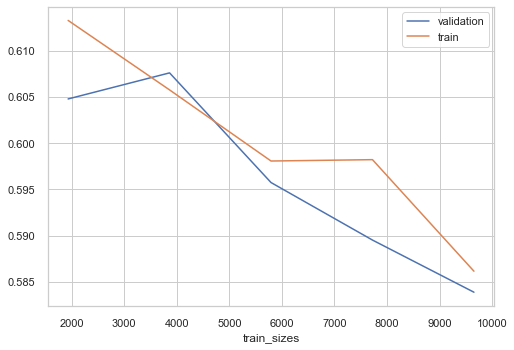

In [71]:
plt.plot(N,val_score.mean(axis=1), label= 'validation')
plt.plot(N,train_score.mean(axis=1), label= 'train')
plt.xlabel('train_sizes')
plt.legend()

In [72]:
# print(confusion_matrix(My_test, model4.predict(MX_test)))  
print(classification_report(My_test,model4.predict(MX_test)))

              precision    recall  f1-score   support

           0       0.58      0.05      0.09      1707
           1       0.58      0.97      0.73      2316

    accuracy                           0.58      4023
   macro avg       0.58      0.51      0.41      4023
weighted avg       0.58      0.58      0.46      4023



0.6169171085634383


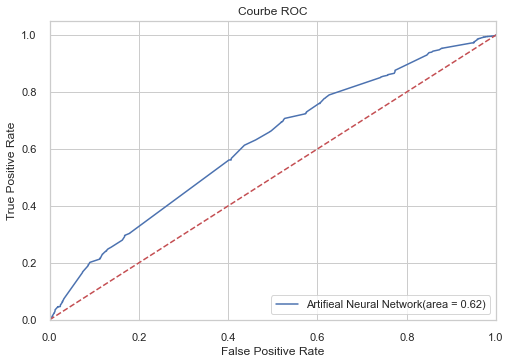

In [73]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred=model4.predict_proba(MX_test)[:,1]
logit_roc_auc = roc_auc_score(My_test,y_pred)
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(My_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Artifieal Neural Network(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Artifieal Neural Network

In [31]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import random
random.seed(1000)
scaler = StandardScaler()
scaler.fit(X1_train)
X1_train = scaler.transform(X1_train)
X1_test = scaler.transform(MX_test)

In [32]:
param_grid={'hidden_layer_sizes':[(15,15,15),(14,13,15),(12,11,15)],'max_iter':[10,50,100, 200, 300,400]}

In [33]:
hidden_layer_sizes=(15,15,15)

In [34]:
param_grid={'max_iter':[10,50,100, 200, 300,400]}
grid5=GridSearchCV(MLPClassifier(hidden_layer_sizes=(12,12,12)),param_grid, cv=cv2)
grid5.fit(X1_train,y1_train)
print('best score',grid5.best_score_)
print('best score',grid5.best_params_)
model5=grid5.best_estimator_
print('best score',model5.score(X1_test,My_test))

best score 0.6191058444472446
best score {'max_iter': 50}
best score 0.6286353467561522


In [35]:
N, train_score, val_score=learning_curve(model5, X1_train, y1_train, train_sizes=np.linspace(0.2, 1.0,5), cv=cv2)

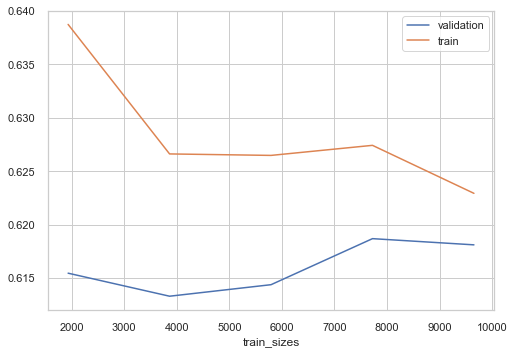

In [36]:
plt.plot(N,val_score.mean(axis=1), label= 'validation')
plt.plot(N,train_score.mean(axis=1), label= 'train')
plt.xlabel('train_sizes')
plt.legend()

In [39]:
print(confusion_matrix(My_test, model5.predict(X1_test)))  
print(classification_report(My_test,model5.predict(X1_test)))

[[ 676 1031]
 [ 463 1853]]
              precision    recall  f1-score   support

           0       0.59      0.40      0.48      1707
           1       0.64      0.80      0.71      2316

    accuracy                           0.63      4023
   macro avg       0.62      0.60      0.59      4023
weighted avg       0.62      0.63      0.61      4023



0.6477727340332857


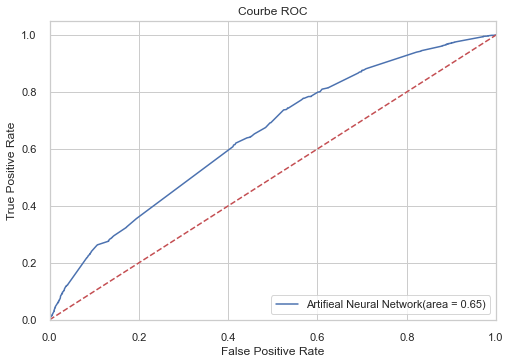

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred=model5.predict_proba(X1_test)[:,1]
logit_roc_auc = roc_auc_score(My_test,y_pred)
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(My_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Artifieal Neural Network(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()